In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

In [2]:
apple_data = pd.read_csv("Data/AAPL.csv")

In [3]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
apple_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [5]:
apple_data.shape

(10468, 7)

In [51]:
#Forgot to make training and testing dataset XDDD
train = apple_data[:8375]
test = apple_data[8375:10468]

In [7]:
print(train.shape)
print(test.shape)

(8375, 7)
(2093, 7)


In [8]:
#Incase anyone wants to have data separated beforehand
train.to_csv('Data/train.csv')
test.to_csv('Data/test.csv')

In [9]:
train.all().isna()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8.375000e+03
mean,2.689598,2.720254,2.654557,2.687830,2.305947,3.772156e+08
std,5.143343,5.189875,5.087162,5.138747,4.438128,3.622719e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.238560,0.243304,0.233259,0.238281,0.199379,1.477392e+08
50%,0.379464,0.386161,0.370536,0.379464,0.312520,2.665936e+08
75%,1.969285,2.007500,1.937857,1.963214,1.678584,4.745692e+08
max,25.086071,25.181070,24.984644,25.075001,21.531624,7.421641e+09


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8375 non-null   object 
 1   Open       8375 non-null   float64
 2   High       8375 non-null   float64
 3   Low        8375 non-null   float64
 4   Close      8375 non-null   float64
 5   Adj Close  8375 non-null   float64
 6   Volume     8375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 458.1+ KB


In [12]:
stock_open = train.iloc[:,1:2].values

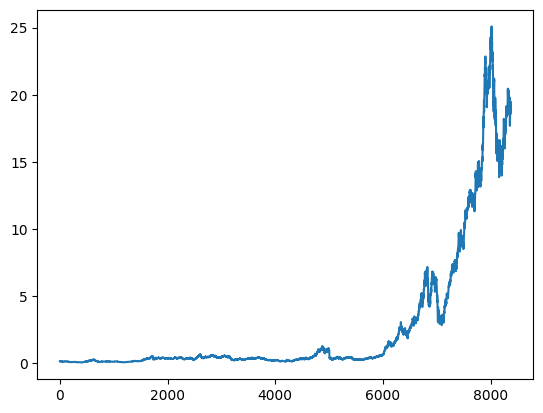

In [14]:
plt.plot(stock_open)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_stock_open = scaler.fit_transform(stock_open)

In [16]:
scaled_stock_open

array([[0.00314274],
       [0.00289758],
       [0.00254094],
       ...,
       [0.7442867 ],
       [0.75317376],
       [0.74494286]])

In [17]:
print('Mean : ',scaled_stock_open.mean(axis=0))

Mean :  [0.10544379]


In [18]:
print('Standard deviation : ',scaled_stock_open.std(axis=0))

Standard deviation :  [0.20542228]


In [19]:
train.shape

(8375, 7)

In [20]:
scaled_stock_open.shape

(8375, 1)

In [21]:
X_train = []
y_train = []
for i in range(60,8375):
    X_train.append(scaled_stock_open[i-60:i,0])
    y_train.append(scaled_stock_open[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

The above code converts a 1-D array into a 3-D array with dimensions {batch_size, sequence_length} as the LSTM model expects the data to be in the shape of {batch_size, sequence_length, num_features}. num_features is set to one in the next code cells.

In [22]:
print(X_train.shape)
print(y_train.shape)

(8315, 60)
(8315,)


In [23]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(8315, 60, 1)


Building the LSTM model

In [24]:
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [25]:
#Defining the model 
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [33]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
260/260 [==============================] - 17s 53ms/step - loss: 4.4575e-04
Epoch 2/10
260/260 [==============================] - 14s 55ms/step - loss: 3.8958e-04
Epoch 3/10
260/260 [==============================] - 14s 55ms/step - loss: 3.4500e-04
Epoch 4/10
260/260 [==============================] - 14s 56ms/step - loss: 3.8572e-04
Epoch 5/10
260/260 [==============================] - 14s 56ms/step - loss: 3.7120e-04
Epoch 6/10
260/260 [==============================] - 14s 55ms/step - loss: 3.6415e-04
Epoch 7/10
260/260 [==============================] - 14s 55ms/step - loss: 3.5161e-04
Epoch 8/10
260/260 [==============================] - 14s 55ms/step - loss: 4.1249e-04
Epoch 9/10
260/260 [==============================] - 14s 55ms/step - loss: 3.6316e-04
Epoch 10/10
260/260 [==============================] - 14s 55ms/step - loss: 3.4772e-04


In [35]:
train_predict = model.predict(X_train)

260/260 [==============================] - 4s 13ms/step


In [38]:
train_predict = scaler.inverse_transform(train_predict)

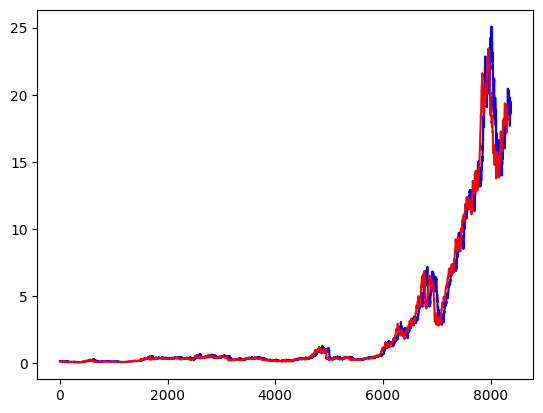

In [39]:
plt.plot(stock_open,color='blue')
plt.plot(train_predict,color='red')
plt.show()

In [34]:
#Saving the model 
import pickle as pk
with open('Models/LSTM_model.pkl','wb') as file:
    pk.dump(model,file)

Predicting on test data

In [70]:
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')
test = pd.DataFrame(test.iloc[:,2:3].values)
train = pd.DataFrame(train.iloc[:,2:3].values)


In [71]:
dataset_total = pd.concat((train,test),axis=0)

In [72]:
dataset_total.shape

(10468, 1)

In [83]:
test.shape

(2093, 1)

In [77]:
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values

In [81]:
inputs = scaler.fit_transform(inputs)

In [82]:
inputs.shape

(2153, 1)

In [84]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

In [90]:
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [92]:
predicted_stock_price = model.predict(X_test)

66/66 [==============================] - 1s 13ms/step


In [94]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

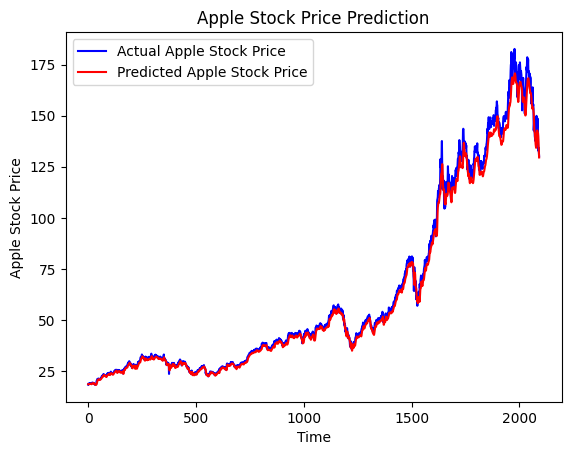

In [114]:
plt.plot(test, color = 'blue', label = 'Actual Apple Stock Price')
plt.plot (predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel ('Apple Stock Price')
plt.legend ()
plt.show()

In [111]:
rmse = np.mean((test-predicted_stock_price)**2)

In [113]:
print(f'The test RMS error of the model was {rmse}')

The test RMS error of the model was 11.850909423375434
